In [1]:
!ls

DATA_testing_studentID.xlsx  DATA_validating.xlsx
DATA_training.xlsx	     sample_data


In [2]:
import numpy as np
# import pandas for xlsx data loading
import pandas as pd
# sci-kit learn: split test data
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, cross_val_score)
# sci-kit learn: logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# sci-kit learn: SVC
from sklearn.svm import SVC
# sci-kit learn: use PCA to do dimensionality reduction
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
# sci-kit learn: preprocessing
from sklearn.preprocessing import (FunctionTransformer, StandardScaler)

# SMOTE
from imblearn.over_sampling import SMOTE

# matplot visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

# decision regions
from mlxtend.plotting import plot_decision_regions

# statistical visualizations and aesthetics
import seaborn as sns
from time import time
sns.set_style("ticks")
training_data = pd.read_excel('./DATA_training.xlsx')
validating_data = pd.read_excel('./DATA_validating.xlsx')
testing_data = pd.read_excel('./DATA_testing_studentID.xlsx')
print(training_data)
print(training_data.describe())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


              n1           n2          T2  ...        gc1      Qmfs  type
0    9242.285714  5664.285714  715.086978  ...  60.982155  1.408163     4
1    8902.428571  5324.428571  684.198475  ...  51.697529  1.055778     3
2    9007.000000  5429.000000  696.913574  ...  54.492353  1.139832     3
3    8980.857143  5402.857143  694.221395  ...  53.780899  1.116755     3
4    9477.571429  5899.571429  737.765650  ...  67.260992  1.742692     4
..           ...          ...         ...  ...        ...       ...   ...
808  9312.000000  5734.000000  721.810412  ...  62.848092  1.432233     3
809  8671.500000  5093.500000  656.187417  ...  45.405788  0.910915     2
810  9205.250000  5627.250000  711.555316  ...  59.987324  1.366401     5
811  9098.500000  5520.500000  702.566990  ...  57.076608  1.293414     5
812  9312.000000  5734.000000  712.578315  ...  63.026407  1.361971     1

[813 rows x 12 columns]
                n1           n2          T2  ...         gc1        Qmfs        type
co

Plot

<Figure size 432x288 with 0 Axes>

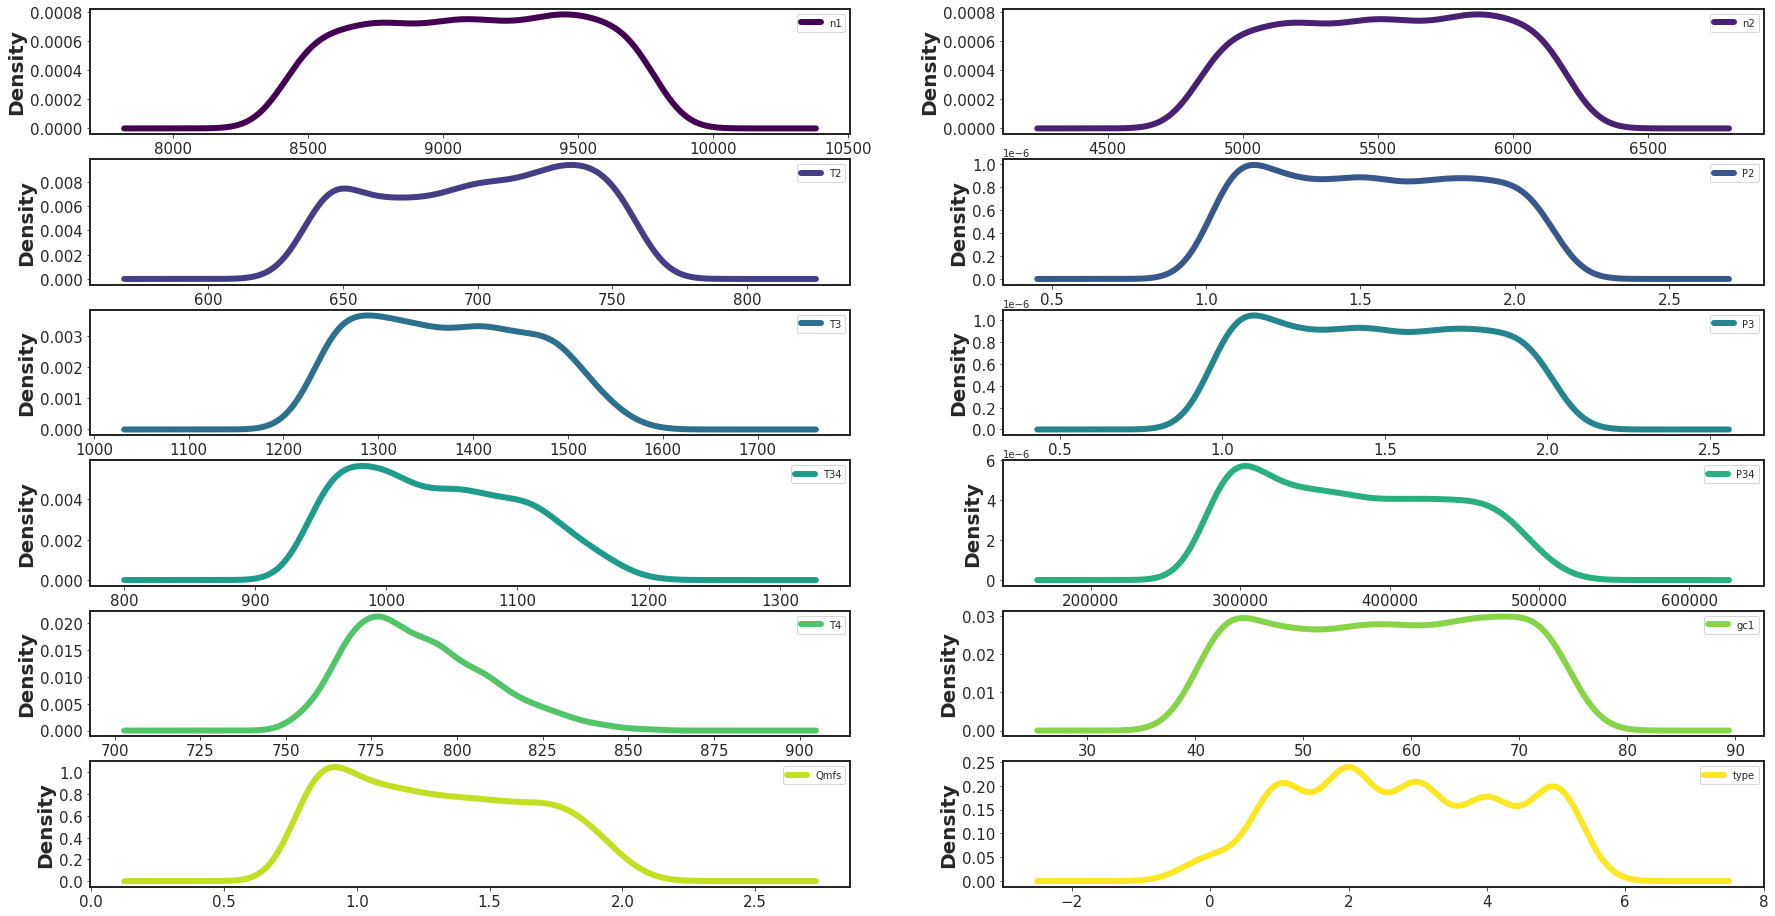

In [3]:
# plot: attribute distribution
plt.figure()
mpl.rcParams['axes.linewidth'] = 2 #set the value globally
mpl.rcParams['legend.fontsize'] = 10 #set the value globally
Axes = training_data.plot(kind='density', lw=6, subplots=True, layout=(11,2),figsize=(30, 30),
                 sharex = False ,sharey=False, legend=True , colormap = "viridis")
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_label(), 'size', 20) for item in Axes.ravel()]
[plt.setp(item.yaxis.get_label(), 'weight', 'bold') for item in Axes.ravel()]
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


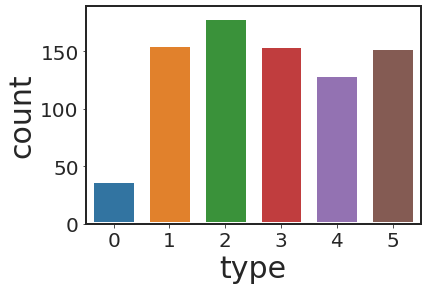

In [4]:
# plot: class distribution
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.labelsize"] = 30
sns.countplot(training_data['type']  , linewidth=5,  label='big')
plt.show()

In [5]:
# drop 'type'
X_train = training_data.iloc[:, :-1]
X_validate = validating_data.iloc[:, :-1]
X_test = testing_data.iloc[:, :-1]
# use 'type'
y_train = training_data.iloc[:, -1]
y_validate = validating_data.iloc[:, -1]
print(X_train)
print(y_train)
X_train.shape, y_train.shape

              n1           n2          T2  ...          T4        gc1      Qmfs
0    9242.285714  5664.285714  715.086978  ...  791.530368  60.982155  1.408163
1    8902.428571  5324.428571  684.198475  ...  766.778499  51.697529  1.055778
2    9007.000000  5429.000000  696.913574  ...  767.688072  54.492353  1.139832
3    8980.857143  5402.857143  694.221395  ...  766.634330  53.780899  1.116755
4    9477.571429  5899.571429  737.765650  ...  825.079963  67.260992  1.742692
..           ...          ...         ...  ...         ...        ...       ...
808  9312.000000  5734.000000  721.810412  ...  782.389417  62.848092  1.432233
809  8671.500000  5093.500000  656.187417  ...  777.863518  45.405788  0.910915
810  9205.250000  5627.250000  711.555316  ...  787.711566  59.987324  1.366401
811  9098.500000  5520.500000  702.566990  ...  790.828211  57.076608  1.293414
812  9312.000000  5734.000000  712.578315  ...  766.055315  63.026407  1.361971

[813 rows x 11 columns]
0      4
1     

((813, 11), (813,))

In [6]:
X_train = np.array(X_train)
X_validate = np.array(X_validate)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_validate = np.array(y_validate)
smo = SMOTE(random_state=43)
X_train, y_train = smo.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [7]:
f_mean, f_std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
print(f_mean, f_std)
X_train = (X_train - f_mean) / f_std
X_validate = (X_validate - f_mean) / f_std
X_test = (X_test - f_mean) / f_std

[9.11732912e+03 5.53932912e+03 7.00742300e+02 1.55285965e+06
 1.37497636e+03 1.47521667e+06 1.03830381e+03 3.77327958e+05
 7.88341087e+02 5.76295442e+01 1.30839140e+00] [3.88636151e+02 3.88636151e+02 3.64845032e+01 3.25500273e+05
 8.75817536e+01 3.09225260e+05 6.25800064e+01 6.47623530e+04
 1.87818982e+01 1.02085705e+01 3.50042430e-01]


In [8]:
# PCA transform
pca = PCA()
pca.fit(X_train)
pca.fit(X_validate)
pca.fit(X_test)

X_train = pca.transform(X_train)
X_validate = pca.transform(X_validate)
X_test = pca.transform(X_test)

In [9]:
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
h_validate = model.predict(X_validate)
h_validate_svc = model_svc.predict(X_validate)

In [12]:
h_validate

array([2, 0, 0, 5, 1, 4, 3, 2, 3, 4, 1, 0, 4, 0, 4, 2, 4, 2, 2, 5, 4, 5,
       1, 4, 1, 4, 0, 1, 3, 5, 5, 2, 5, 1, 0, 3, 1, 0, 5, 5, 3, 1, 2, 1,
       5, 2, 1, 5, 3, 4, 1, 5, 2, 4, 0, 1, 2, 3, 5, 3, 4, 5, 5, 3, 2, 0,
       0, 5, 1, 2, 4, 3, 3, 3, 1, 3, 1, 2, 4, 1, 4, 1, 1, 4, 1, 4, 2, 1,
       5, 5, 0, 1, 1, 0, 4, 3, 0, 4, 5, 2, 0, 4, 1, 1, 3, 1, 4, 1, 2, 3,
       3, 4, 4, 2, 0, 0, 4, 4, 1, 3, 5, 3, 3, 3, 4, 1, 1, 0, 3, 3, 0, 4,
       4, 5, 4, 4, 5, 5, 5, 4, 4, 4, 2, 3, 0, 0, 2, 2, 5, 3, 4, 2, 1, 3,
       2, 5, 3, 4, 1, 2, 1, 2, 2, 5, 5, 0, 5, 5, 1, 2, 1, 1, 3, 4, 3, 3,
       0, 1, 1, 5, 1, 3, 5, 5, 5, 5, 1, 2, 0, 4, 3, 2, 3, 4, 5, 2, 3, 3,
       1, 1, 1, 5, 3, 3, 4, 1, 0, 1, 1, 3, 2, 2, 2, 2, 4, 5, 3, 5, 4, 0,
       2, 4, 5, 4, 1, 4, 4, 3, 1, 4, 5, 5, 2, 4, 5, 0, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 5, 4, 1, 3, 4, 2, 4, 5, 5, 3, 4, 5, 5, 1, 0, 0, 1, 4,
       5, 0, 3, 5, 4, 1, 1, 3, 0, 1, 0, 2, 5, 5, 0, 2, 5, 2, 1, 0, 2, 2,
       5, 3, 5, 4, 1, 3, 1, 4, 2, 4, 1, 3, 3, 2, 4,

In [13]:
h_validate_svc

array([5, 0, 0, 5, 1, 4, 3, 5, 3, 4, 1, 0, 4, 5, 4, 0, 4, 5, 4, 0, 4, 0,
       0, 4, 3, 4, 0, 1, 3, 5, 5, 5, 5, 0, 0, 3, 1, 0, 5, 5, 3, 1, 5, 1,
       5, 4, 1, 5, 3, 4, 0, 0, 4, 4, 0, 1, 2, 3, 0, 3, 4, 5, 5, 3, 5, 0,
       0, 5, 1, 2, 4, 3, 3, 3, 1, 0, 1, 0, 4, 1, 4, 1, 1, 4, 1, 4, 2, 1,
       5, 5, 3, 1, 0, 0, 4, 0, 0, 4, 5, 5, 0, 5, 0, 1, 0, 1, 4, 3, 5, 0,
       3, 4, 4, 5, 0, 0, 4, 4, 1, 3, 0, 3, 3, 0, 4, 1, 1, 0, 3, 3, 5, 4,
       4, 5, 4, 2, 5, 0, 0, 2, 4, 4, 2, 3, 0, 0, 2, 0, 5, 3, 4, 2, 1, 0,
       5, 0, 3, 4, 0, 2, 1, 5, 5, 5, 5, 0, 5, 5, 1, 2, 0, 1, 3, 2, 3, 3,
       0, 1, 1, 5, 3, 3, 0, 5, 5, 5, 1, 5, 0, 5, 3, 2, 3, 4, 5, 5, 3, 3,
       1, 1, 1, 0, 3, 3, 4, 0, 1, 1, 1, 3, 2, 0, 2, 5, 4, 5, 3, 5, 4, 0,
       2, 4, 0, 4, 1, 4, 4, 3, 1, 4, 5, 0, 2, 4, 0, 0, 1, 2, 4, 5, 5, 2,
       2, 1, 5, 1, 5, 4, 1, 3, 4, 2, 4, 0, 0, 3, 4, 5, 5, 1, 0, 0, 1, 4,
       5, 5, 0, 5, 4, 1, 0, 3, 0, 1, 0, 5, 5, 0, 5, 2, 5, 5, 1, 0, 5, 2,
       0, 3, 0, 4, 3, 0, 1, 4, 2, 4, 1, 3, 3, 2, 2,

In [14]:
print("Accuracy using logistics regression (softmax): %.3f% %"  %(((h_validate) == y_validate).sum() / y_validate.size * 100))
print("Accuracy using SVC: %.3f% %" %(((h_validate_svc) == y_validate).sum() / y_validate.size * 100))

Accuracy using logistics regression (softmax): 81.250%
Accuracy using SVC: 61.000%


In [15]:
result = model.predict(X_test)
result_svc = model_svc.predict(X_test)

In [16]:
result

array([5, 5, 4, 0, 2, 2, 5, 3, 3, 2, 2, 1, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2,
       0, 4, 4, 5, 1, 0, 2, 5, 3, 0, 5, 2, 3, 4, 1, 0, 1, 5, 4, 3, 4, 1,
       3, 1, 4, 1, 4, 0, 2, 4, 3, 3, 4, 4, 5, 4, 1, 3, 5, 3, 5, 1, 3, 1,
       5, 1, 4, 5, 1, 5, 5, 5, 1, 2, 2, 4, 4, 2, 1, 5, 1, 3, 1, 1, 2, 2,
       1, 2, 2, 4, 0, 0, 5, 2, 5, 4, 3, 1, 0, 1, 2, 1, 1, 2, 3, 4, 0, 4,
       0, 5, 0, 0, 2, 3, 1, 0, 2, 0, 3, 1, 3, 3, 4, 5, 1, 2, 0, 2, 4, 2,
       3, 5, 5, 1, 0, 1, 2, 3, 2, 5, 4, 2, 4, 4, 2, 5, 4, 4, 5, 1, 3, 5,
       2, 1, 2, 5, 2, 4, 5, 2, 3, 0, 2, 2, 0, 5, 2, 0, 3, 1, 5, 3, 2, 4,
       2, 1, 2, 3, 4, 1, 0, 1, 3, 0, 5, 1, 5, 1, 5, 4, 1, 0, 1, 1, 3, 1,
       1, 2, 1, 5, 2, 1, 3, 5, 3, 2, 1, 2, 5, 1, 2, 5, 3, 0, 0, 2, 2, 4,
       2, 0, 4, 2, 2, 0, 1, 5, 4, 1, 3, 0, 3, 3, 5, 1, 5, 0, 0, 3, 1, 1,
       1, 5, 5, 2, 2, 4, 1, 2, 0, 1, 0, 1, 0, 0, 4, 4, 2, 1, 4, 3, 0, 2,
       0, 4, 3, 2, 3, 4, 5, 5, 2, 0, 2, 4, 5, 2, 2, 2, 3, 3, 3, 5, 5, 1,
       3, 1, 1, 1, 2, 1, 1, 5, 2, 5, 5, 3, 3, 2, 0,

In [17]:
result_svc

array([0, 5, 4, 0, 5, 5, 0, 0, 3, 2, 5, 1, 3, 3, 5, 0, 0, 3, 3, 0, 3, 2,
       5, 4, 4, 5, 1, 0, 5, 0, 3, 5, 5, 5, 0, 4, 1, 0, 0, 5, 4, 0, 4, 1,
       3, 1, 4, 1, 4, 0, 5, 4, 3, 3, 2, 4, 5, 4, 1, 3, 5, 3, 5, 1, 3, 0,
       0, 1, 5, 5, 1, 5, 5, 5, 1, 2, 4, 4, 2, 2, 1, 0, 1, 3, 1, 1, 4, 5,
       1, 5, 2, 4, 5, 0, 5, 0, 5, 4, 0, 1, 0, 1, 5, 1, 1, 2, 0, 4, 0, 4,
       0, 0, 0, 0, 5, 3, 0, 0, 4, 0, 3, 0, 3, 3, 4, 5, 0, 4, 0, 5, 4, 5,
       3, 5, 5, 0, 0, 1, 5, 0, 5, 5, 4, 2, 4, 4, 2, 5, 4, 4, 5, 1, 0, 5,
       5, 1, 5, 5, 2, 4, 5, 2, 3, 0, 2, 0, 0, 5, 2, 0, 3, 1, 0, 3, 2, 4,
       4, 1, 5, 3, 4, 0, 0, 1, 3, 0, 5, 3, 5, 1, 0, 2, 1, 0, 1, 1, 3, 1,
       1, 5, 1, 0, 5, 3, 3, 0, 0, 2, 1, 2, 5, 0, 5, 5, 3, 0, 0, 2, 2, 4,
       5, 5, 4, 5, 5, 0, 1, 5, 2, 1, 0, 0, 0, 3, 5, 1, 5, 0, 5, 3, 1, 1,
       1, 0, 5, 2, 2, 4, 0, 2, 0, 1, 0, 3, 0, 0, 4, 4, 2, 1, 4, 3, 0, 5,
       0, 4, 0, 5, 3, 4, 5, 0, 5, 3, 2, 4, 5, 2, 2, 0, 3, 0, 3, 5, 0, 1,
       0, 3, 3, 1, 2, 1, 1, 5, 5, 5, 5, 3, 3, 2, 0,